### Install and import pycatcher package

In [1]:
pip install pycatcher --upgrade


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycatcher as pc

### Package functions to detect outliers

- detect_outliers(df): Detect outliers in a time-series dataframe using seasonal trend decomposition when there is at least 2 years of data, otherwise we can use Interquartile Range (IQR) for smaller timeframe.
- detect_outliers_today(df) Detect outliers for the current date in a time-series dataframe.
- detect_outliers_latest(df): Detect latest outliers in a time-series dataframe.
- detect_outliers_iqr(df): Detect outliers in a time-series dataframe when there's less than 2 years of data.
- detect_outliers_moving_average(df): Detect outliers using moving average method.
- detect_outliers_stl(df): Detect outliers using Seasonal-Trend Decomposition using LOESS (STL).

### Diagnostic functions for plotting

In [3]:
from pycatcher.diagnostics import build_seasonal_plot as build_seasonal_plot
from pycatcher.diagnostics import build_monthwise_plot as build_monthwise_plot
from pycatcher.diagnostics import build_iqr_plot as build_iqr_plot
from pycatcher.diagnostics import build_decomposition_results as build_decomposition_results
from pycatcher.diagnostics import conduct_stationarity_check as conduct_stationarity_check
from pycatcher.diagnostics import build_moving_average_outliers_plot as build_moving_average_outliers_plot
from pycatcher.diagnostics import build_stl_outliers_plot as build_stl_outliers_plot

### Example 1 - Finding Outliers Using IQR

In [4]:
import pandas as pd

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 250, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers(df)

2024-11-30 14:43:11,557 - INFO - Starting outlier detection.
2024-11-30 14:43:11,566 - INFO - Time frequency: D
2024-11-30 14:43:11,566 - INFO - Length of time index: 5.00
2024-11-30 14:43:11,567 - INFO - Using IQR method for outlier detection.
2024-11-30 14:43:11,567 - INFO - Detecting outliers using the IQR method.
2024-11-30 14:43:11,572 - INFO - Detecting outliers using the IQR method.
2024-11-30 14:43:11,578 - INFO - Outliers detected: 1 rows.
2024-11-30 14:43:11,578 - INFO - Outliers detected using IQR: 1 rows.


,Value
Dt,
2024-01-04,250


2024-11-30 14:43:11,584 - INFO - Building IQR plot to see outliers


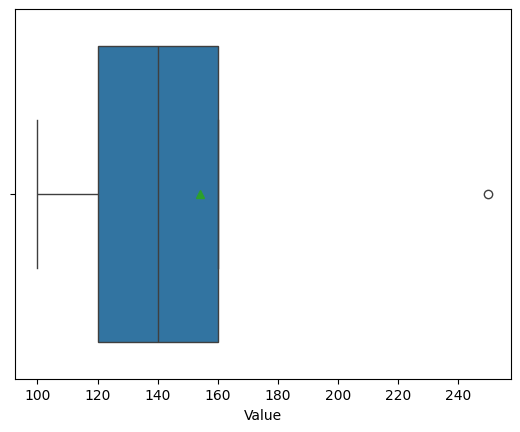

In [5]:
build_iqr_plot(df)

### Example 2 - Finding Outliers Using Seasonal Decomposition

In [6]:
!pip install fsspec


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade certifi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd
df_tsa=pd.read_csv("https://huggingface.co/datasets/bbgatch/tsa-passengers/resolve/main/tsa.csv",sep=',')

In [9]:
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [10]:
x = pc.detect_outliers_latest(df_tsa) 
print(x)

2024-11-30 14:43:12,985 - INFO - Detecting the latest outliers.
2024-11-30 14:43:12,986 - INFO - Starting outlier detection.
2024-11-30 14:43:13,200 - INFO - Time frequency: D
2024-11-30 14:43:13,200 - INFO - Length of time index: 2017.00
2024-11-30 14:43:13,200 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-30 14:43:13,201 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-30 14:43:13,202 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,202 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,203 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,203 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,203 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:13,205 - INFO - Calculating the sum of squares.
2024-11-30 14:43:13,205 - INFO - Sum of squares calculated: 1.60
2024-11-30 14

            passengers
date                  
2024-07-09     2580013


In [11]:
x = pc.detect_outliers(df_tsa) 
print(x)

2024-11-30 14:43:13,210 - INFO - Starting outlier detection.
2024-11-30 14:43:13,213 - INFO - Time frequency: D
2024-11-30 14:43:13,213 - INFO - Length of time index: 2017.00
2024-11-30 14:43:13,213 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-30 14:43:13,214 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-30 14:43:13,215 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,215 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,215 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,215 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,215 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:13,216 - INFO - Calculating the sum of squares.
2024-11-30 14:43:13,216 - INFO - Sum of squares calculated: 1.60
2024-11-30 14:43:13,216 - INFO - Sum of squares of ACF: 1.60
2024-11-30 14:43

            passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-31     1665839
2023-11-21 

In [12]:
x = pc.detect_outliers_today(df_tsa) 
print(x)

2024-11-30 14:43:13,222 - INFO - Detecting today's outliers.
2024-11-30 14:43:13,223 - INFO - Starting outlier detection.
2024-11-30 14:43:13,226 - INFO - Time frequency: D
2024-11-30 14:43:13,226 - INFO - Length of time index: 2017.00
2024-11-30 14:43:13,226 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-30 14:43:13,226 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-30 14:43:13,228 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,228 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,228 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,228 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,228 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:13,229 - INFO - Calculating the sum of squares.
2024-11-30 14:43:13,229 - INFO - Sum of squares calculated: 1.60
2024-11-30 14:43

No Outliers Today!


2024-11-30 14:43:13,234 - INFO - Building month-wise box plot.
2024-11-30 14:43:13,255 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-30 14:43:13,258 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


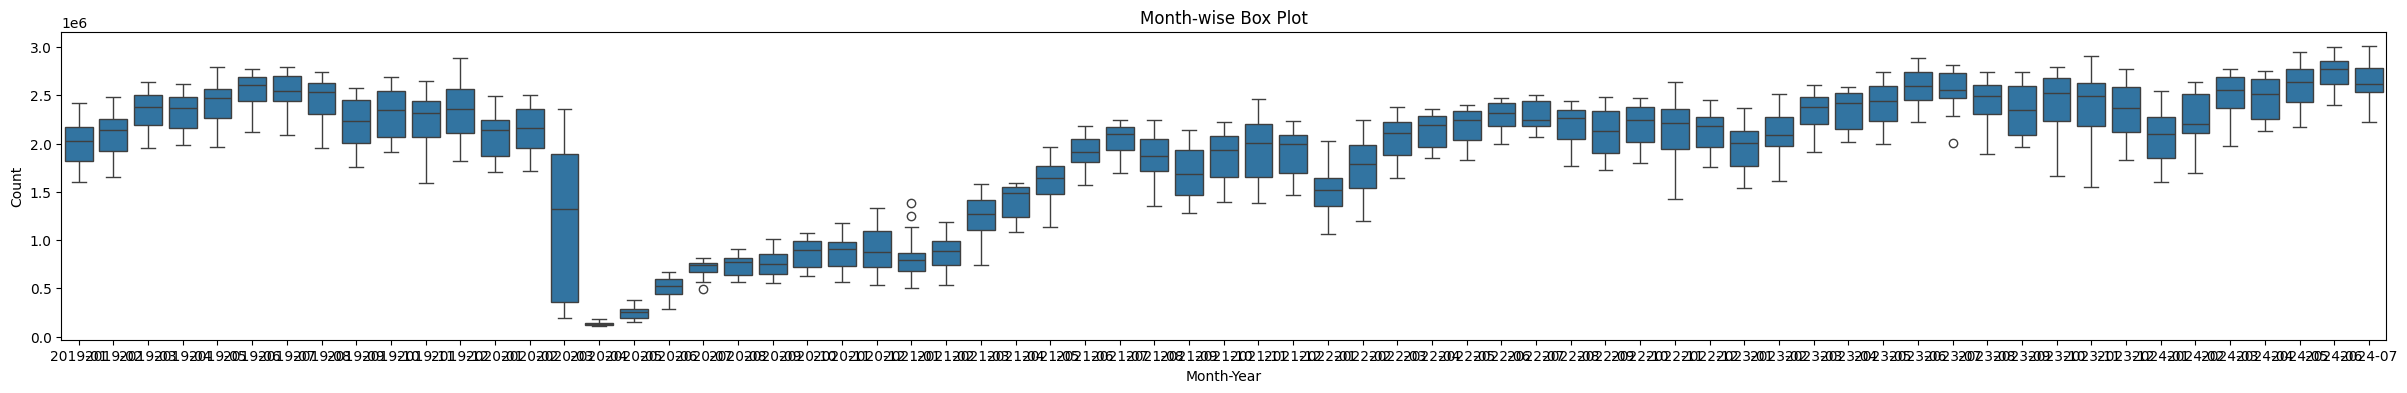

In [13]:
#Diagnostic plots
build_monthwise_plot(df_tsa)

2024-11-30 14:43:13,514 - INFO - Building time-series plot for seasonal decomposition.
2024-11-30 14:43:13,516 - INFO - Time-series data length: 5.00 years
2024-11-30 14:43:13,517 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,518 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,519 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:13,519 - INFO - Number of residuals after NaN removal: 2017
2024-11-30 14:43:13,519 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:13,520 - INFO - Calculating the sum of squares.
2024-11-30 14:43:13,521 - INFO - Sum of squares calculated: 1.60
2024-11-30 14:43:13,521 - INFO - Sum of squares of ACF: 1.60
2024-11-30 14:43:13,521 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:13,522 - INFO - Calculating the sum of squares.
2024-11-30 14:43:13,522 - INFO - Sum of squares calculated: 1.69
2024-11-30 14:43:13,522 - INFO - 

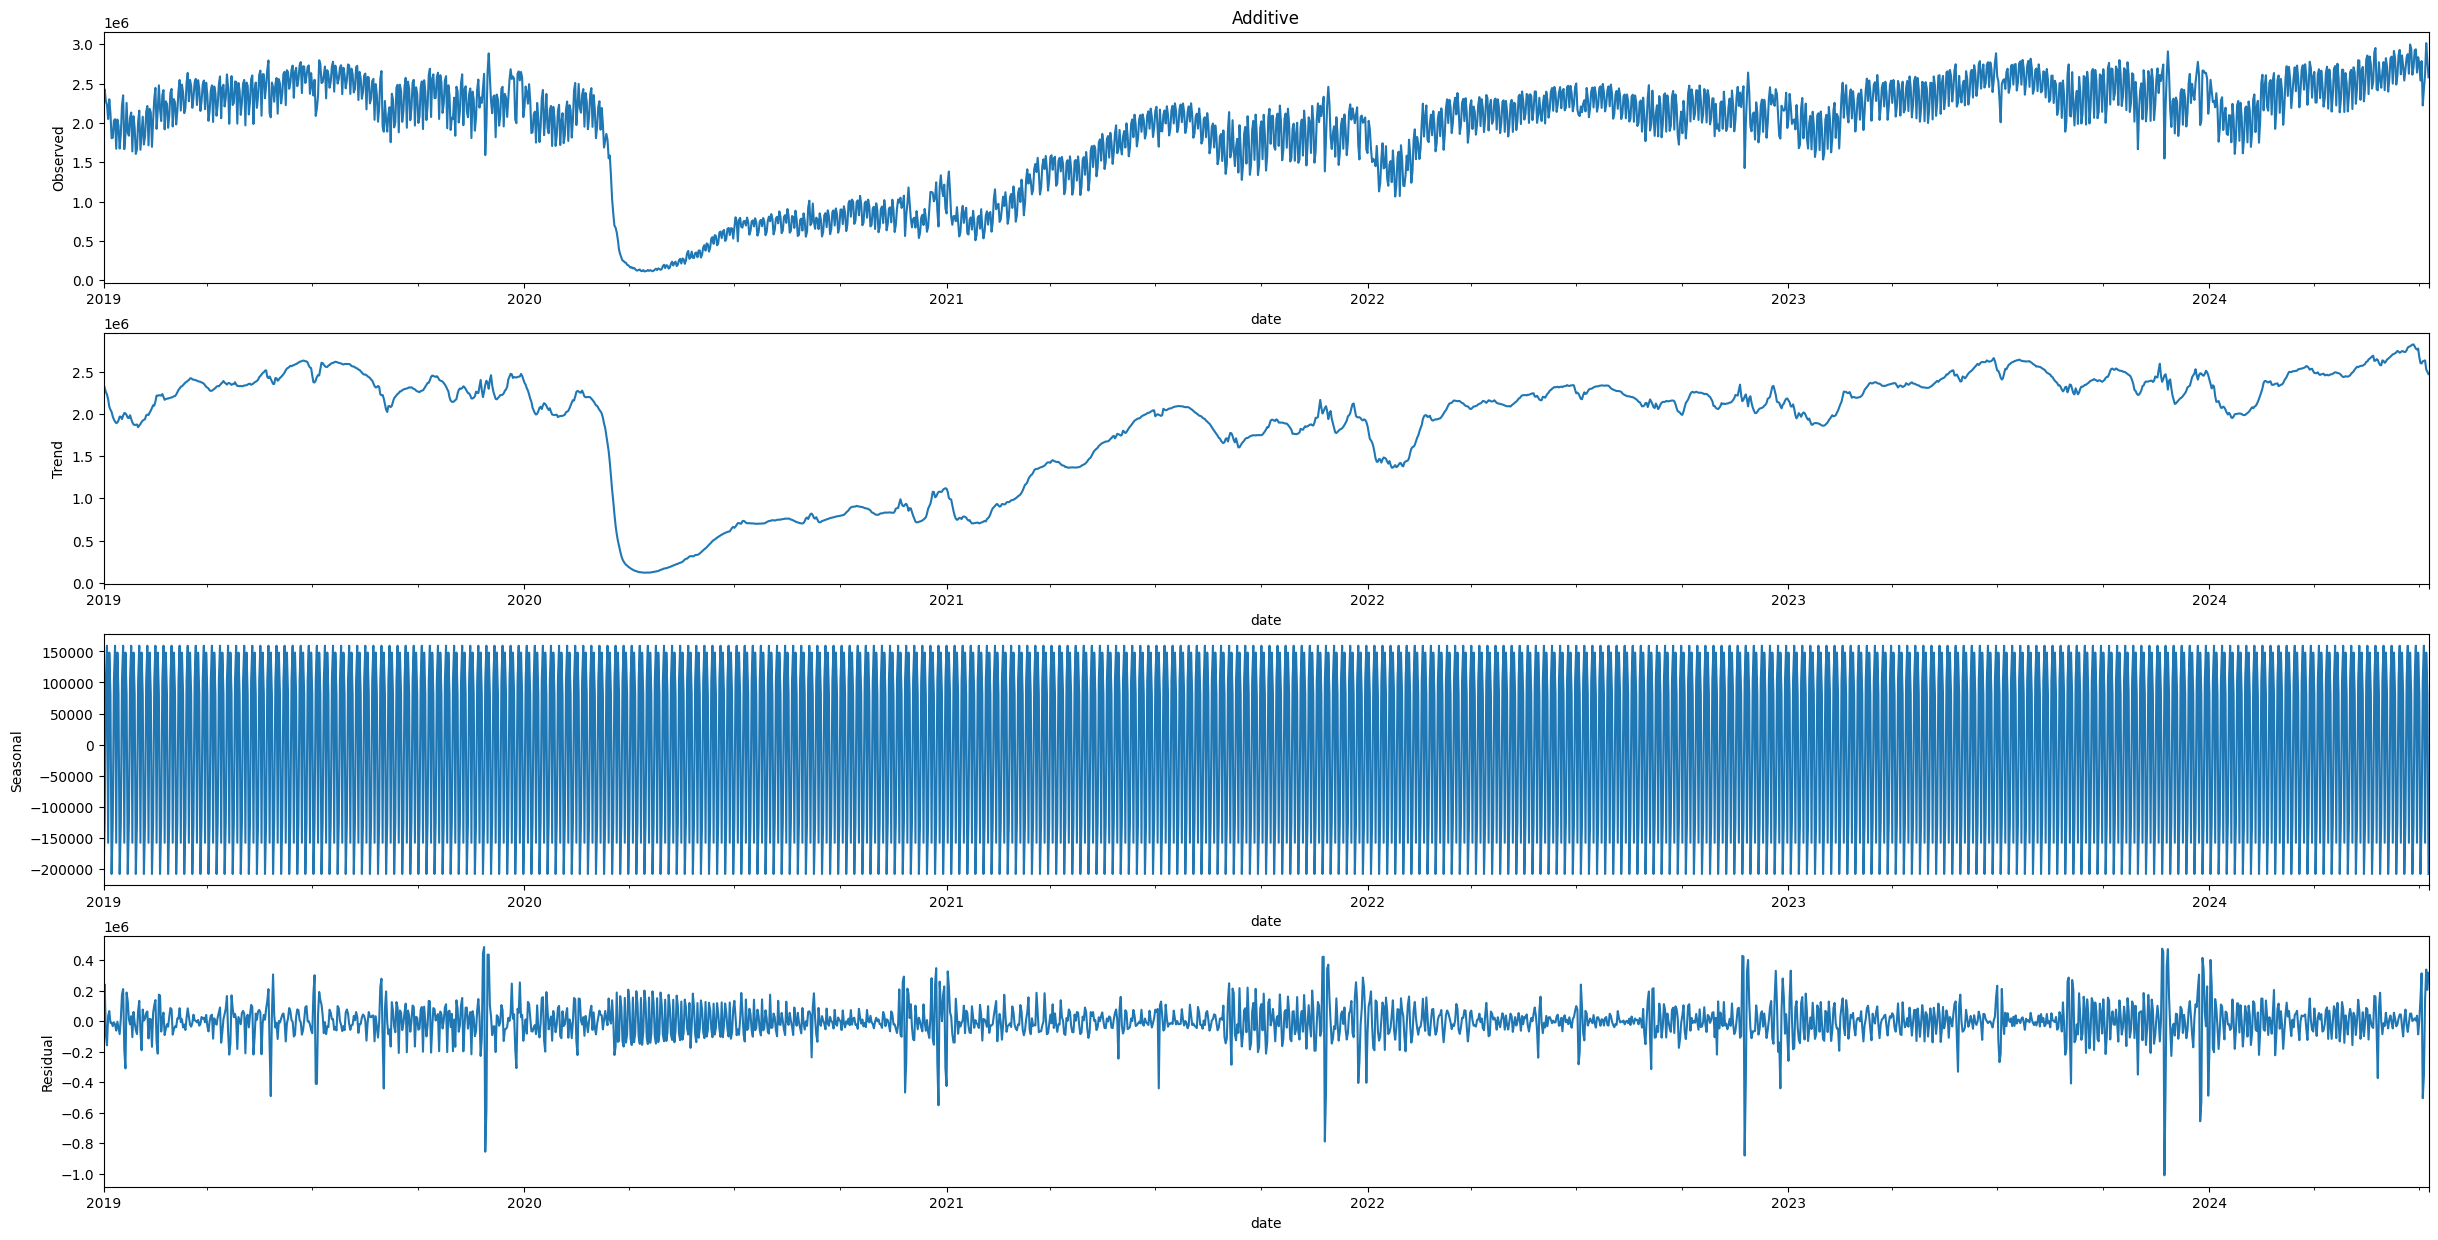

In [14]:
#Diagnostic plots
build_seasonal_plot(df_tsa)

In [15]:
df_ice = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")
df_ice.head(10)

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
5,2004-06,25
6,2004-07,27
7,2004-08,21
8,2004-09,18
9,2004-10,14


In [16]:
x = pc.detect_outliers(df_ice) 
print(x)

2024-11-30 14:43:14,276 - INFO - Starting outlier detection.
2024-11-30 14:43:14,314 - INFO - Time frequency: MS
2024-11-30 14:43:14,314 - INFO - Length of time index: 200.00
2024-11-30 14:43:14,314 - INFO - Using seasonal trend decomposition for for outlier detection in month level time-series.
2024-11-30 14:43:14,315 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-30 14:43:14,316 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:14,316 - INFO - Number of residuals after NaN removal: 200
2024-11-30 14:43:14,317 - INFO - Extracting residuals and removing NaN values.
2024-11-30 14:43:14,317 - INFO - Number of residuals after NaN removal: 200
2024-11-30 14:43:14,317 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-30 14:43:14,317 - INFO - Calculating the sum of squares.
2024-11-30 14:43:14,318 - INFO - Sum of squares calculated: 3.47
2024-11-30 14:43:14,318 - INFO - Sum of squares of ACF: 3.47
2024-11-30 14:43

            interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66


### Example 3 - Finding Outliers Using Seasonal-Trend Decomposition using LOESS (STL)

In [17]:
pc.detect_outliers_stl(df_ice)

2024-11-30 14:43:14,323 - INFO - Starting outlier detection using STL
2024-11-30 14:43:14,325 - INFO - Time frequency: MS
2024-11-30 14:43:14,325 - INFO - Detected Period: 12
2024-11-30 14:43:14,325 - INFO - Derived Seasonal: 13
2024-11-30 14:43:14,332 - INFO - Multiplicative model detected
2024-11-30 14:43:14,332 - INFO - Generating outlier detection using STL
2024-11-30 14:43:14,332 - INFO - Outlier detection using STL Multiplicative Model
2024-11-30 14:43:14,335 - INFO - Generated outlier detection using STL
2024-11-30 14:43:14,336 - INFO - Completing outlier detection using STL


       month  interest
0 2011-04-01        45
1 2016-11-01        46
2 2016-12-01        66


2024-11-30 14:43:14,340 - INFO - Time frequency: MS
2024-11-30 14:43:14,345 - INFO - Generating outlier detection using STL
2024-11-30 14:43:14,345 - INFO - Outlier detection using STL Multiplicative Model
2024-11-30 14:43:14,348 - INFO - Generated outlier detection using STL


Detected Period:  12
Derived Seasonal:  13
Multiplicative model detected
Duplicate date index values. Check your data.


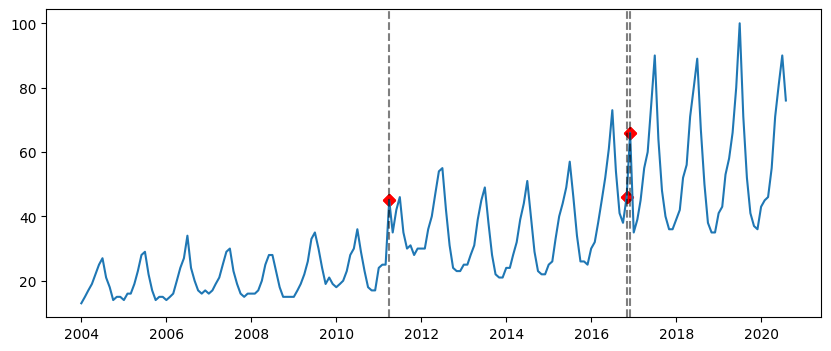

In [18]:
build_stl_outliers_plot(df_ice)

In [19]:
pc.detect_outliers_stl(df_tsa)

2024-11-30 14:43:14,420 - INFO - Starting outlier detection using STL
2024-11-30 14:43:14,422 - INFO - Time frequency: D
2024-11-30 14:43:14,422 - INFO - Detected Period: 365
2024-11-30 14:43:14,422 - INFO - Derived Seasonal: 365
2024-11-30 14:43:14,931 - INFO - Additive model detected
2024-11-30 14:43:14,931 - INFO - Generating outlier detection using STL
2024-11-30 14:43:14,931 - INFO - Outlier detection using STL Additive Model
2024-11-30 14:43:15,225 - INFO - Completing outlier detection using STL


         date  passengers
0  2020-01-12     2253585
1  2020-01-20     2367538
2  2020-01-26     2203488
3  2020-01-30     2154295
4  2020-02-03     2123304
5  2020-02-09     2224826
6  2020-02-13     2415185
7  2020-02-14     2507588
8  2020-02-17     2494922
9  2020-02-23     2380359
10 2020-03-01     2353150


2024-11-30 14:43:15,230 - INFO - Time frequency: D


Detected Period:  365
Derived Seasonal:  365


2024-11-30 14:43:15,738 - INFO - Generating outlier detection using STL
2024-11-30 14:43:15,739 - INFO - Outlier detection using STL Additive Model


Additive model detected
Duplicate date index values. Check your data.


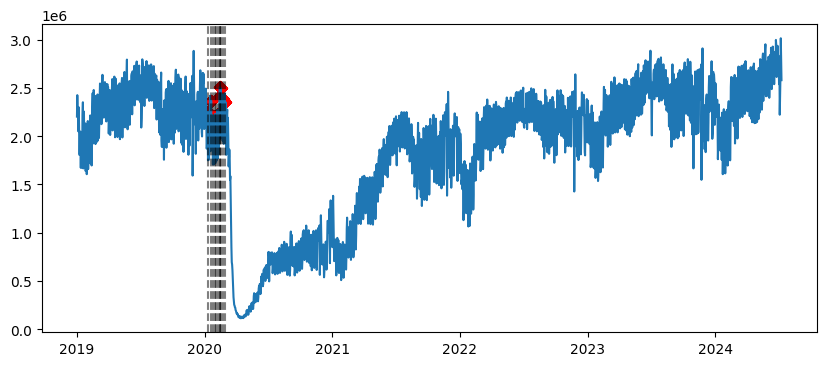

In [20]:
build_stl_outliers_plot(df_tsa)

### Example 4 - Finding Outliers Using Moving Average

In [21]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'random numbers': np.random.randn(200)})
df.head(20)

,random numbers
0,1.445870
1,-0.052438
2,-0.621920
3,0.962122
4,-1.384107
5,-0.177852
6,1.381406
7,-0.866452
8,-0.817628
9,-2.763135


2024-11-30 14:43:16,114 - INFO - Plotting outliers using Moving Average method
2024-11-30 14:43:16,114 - INFO - Starting optimal window size calculation
2024-11-30 14:43:16,115 - INFO - Starting RMSE calculation
2024-11-30 14:43:16,173 - INFO - RMSE calculation completed
2024-11-30 14:43:16,173 - INFO - Optimal Window Size: 2
2024-11-30 14:43:16,183 - INFO - Completed outliers plotting using Moving Average method


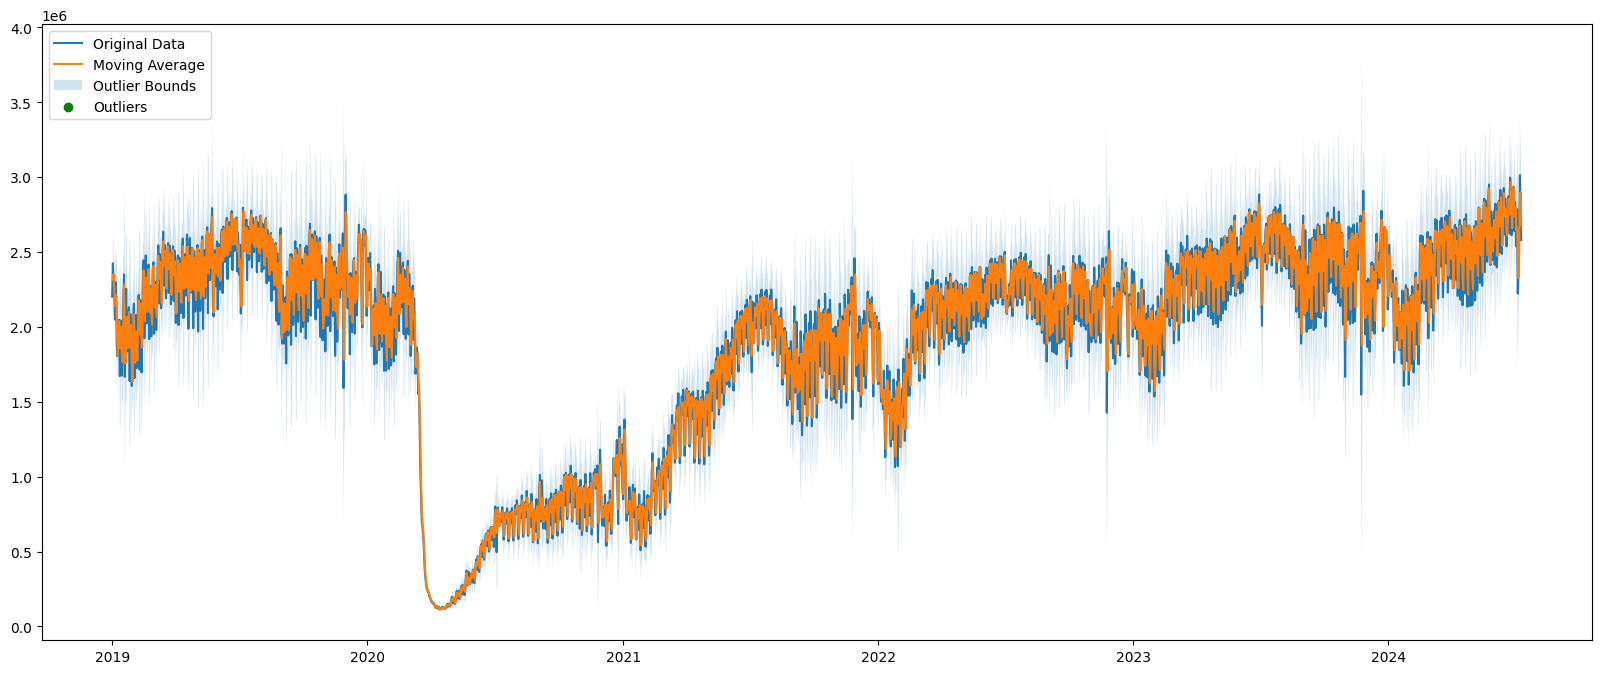

In [22]:
build_moving_average_outliers_plot(df_tsa)

### Example 5 - Miscellaneous diagnostic function - Stationarity Check

In [23]:
conduct_stationarity_check(df_ice)

2024-11-30 14:43:16,370 - INFO - Starting ADF stationarity check
2024-11-30 14:43:16,374 - INFO - ADF Statistic: -0.072707
2024-11-30 14:43:16,374 - INFO - p-value: 0.952090
2024-11-30 14:43:16,374 - INFO - Critical Values:
2024-11-30 14:43:16,374 - INFO - 	1%: -3.466
2024-11-30 14:43:16,374 - INFO - 	5%: -2.877
2024-11-30 14:43:16,374 - INFO - 	10%: -2.575
2024-11-30 14:43:16,374 - INFO - Completed ADF stationarity check
2024-11-30 14:43:16,374 - INFO - Starting KPSS stationarity check
/Users/aseem/Documents/GitHub/outlier_detection/src/pycatcher/diagnostics.py:213: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df_pandas.iloc[:, -1])
2024-11-30 14:43:16,375 - INFO - KPSS Statistic: 2.040868
2024-11-30 14:43:16,375 - INFO - p-value: 0.010000
2024-11-30 14:43:16,375 - INFO - n_lags: 8.000000
2024-11-30 14:43:16,376 

ADF - The series is not Stationary


KPSS - The series is not Stationary
